In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


- 탐색적 데이터 분석 : 분포도, 막대 그래프, 박스플롯, 포인트플롯, 산점도, 히트맵
- 머신러닝 모델 : 선형 회귀, 릿지 회귀, 라쏘 회귀, 랜덤 포레스트 회귀
- 하이퍼파라미터 최적화 : 그리드 서치 

# 탐색적 데이터 분석 (EDA) 

## 데이터 둘러보기 

In [37]:
import numpy as np
import pandas as pd

data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [38]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [39]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [40]:
test.head() # test에는 casual, registered, count가 없음 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [41]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [42]:
train.info() # 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 피처 엔지니어링

In [44]:
print(train['datetime'][100])
print(train['datetime'][100].split())
print(train['datetime'][100].split()[0]) # 날짜 
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [45]:
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split('-'))
print(train['datetime'][100].split()[0].split('-')[0]) # 연도
print(train['datetime'][100].split()[0].split('-')[1]) # 월
print(train['datetime'][100].split()[0].split('-')[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [46]:
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(":"))
print(train['datetime'][100].split()[1].split(":")[0]) # 시간
print(train['datetime'][100].split()[1].split(":")[1]) # 분
print(train['datetime'][100].split()[1].split(":")[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


In [47]:
train['date'] = train['datetime'].apply(lambda x : x.split()[0]) # 피처 전체에 할 때는 lambda를 사용 

# 수치형 중 이산형이기에 그냥 문자열 형태로 두는게 나을 것 
train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])

- year, month, day 만들었기에 date 제거
- month 세 개씩 묶으면 season, 지나치게 세분화된 피처를 더 큰 분류로 묶으면 성능 좋아지는 경우 있음, month 피처 제거 

In [48]:
from datetime import datetime 
import calendar

print(train['date'][100])
print(datetime.strptime(train['date'][100], "%Y-%m-%d")) # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], "%Y-%m-%d").weekday()) # 정수로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], "%Y-%m-%d").weekday()]) # 문자열로 요일 반환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [49]:
train['weekday'] = train['date'].apply( # weekday 피처 생성 : 요일 문자열
    lambda dateString:
    calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [50]:
# 범주형 데이터 변환 : 정수 -> 문자열 
train['season'] = train['season'].map({1: 'Spring',
                                      2: 'Summer',
                                      3: 'Fall',
                                      4: 'Winter'})
train['weather'] = train['weather'].map({1:'Clear',
                                        2:'Mist, Few clouds',
                                        3: 'Light Snow, Rain, Thunder',
                                        4: 'Heavy Snow, Rain, Thunder'})

In [51]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 데이터 시각화 

In [52]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

### 분포도
수치형 데이터 하나의 분포를 나타내는 그래프 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


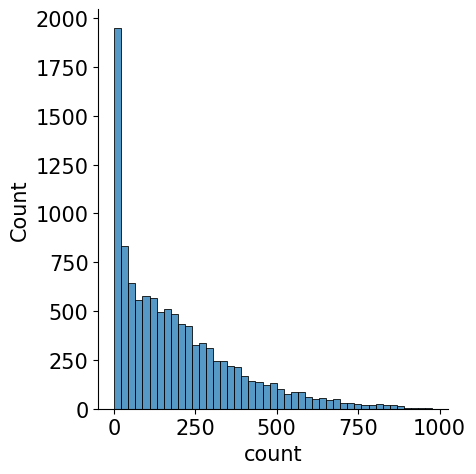

In [53]:
# 대여 횟수(타깃값)의 분포도 
mpl.rc('font', size = 15)
sns.displot(train['count'])

PROBLEM : 타깃값인 count가 0 근처에 몰려있음, 회귀 모델이 좋은 성능을 내려면 데이터가 정규 분포를 따라야 하는데 현재 타깃값은 그렇지 못함<BR>
SOLUTION: **로그 변환**, 데이터 분포를 정규 분포에 가깝게 만들기 위해 많이 사용하는 방법 => log(count)를 예측하되 마지막에는 지수변환을 통해 count로 복원

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


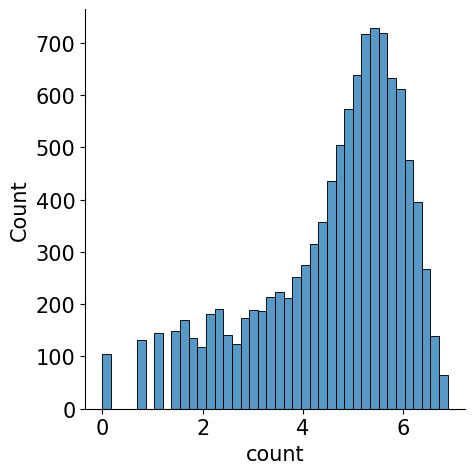

In [54]:
sns.displot(np.log(train['count']))

### 막대 그래프
범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용, 평균은 막대 높이로, 신뢰구간은 오차 막대로 표현

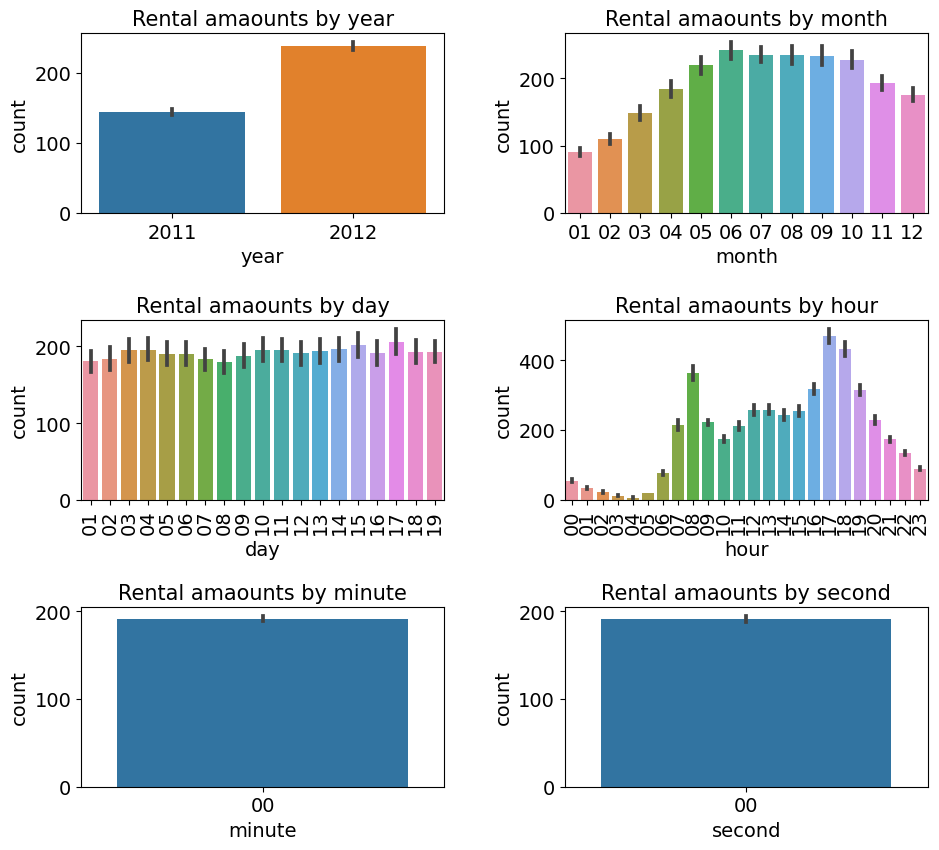

In [55]:
# m행 n열 Figure 준비
mpl.rc('font', size = 14) # 폰트 크기 설정
mpl.rc('axes', titlesize = 15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows = 3, ncols = 2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9) # figure 크기를 10 * 9 inch로 설정

# 각 축에 서브 플롯 할당
# 연도, 월, 일, 시, 분, 초별 대여 수량 막대 그래프 (범주형 데이터에 따라 달리지는 수치형 데이터)
sns.barplot(x = 'year', y = 'count', data = train, ax = axes[0, 0])
sns.barplot(x = 'month', y = 'count', data = train, ax = axes[0, 1])
sns.barplot(x = 'day', y = 'count', data = train, ax = axes[1, 0])
sns.barplot(x = 'hour', y = 'count', data = train, ax = axes[1, 1])
sns.barplot(x = 'minute', y = 'count', data = train, ax = axes[2, 0])
sns.barplot(x = 'second', y = 'count', data = train, ax = axes[2, 1])

# 서브플롯에 제목 달기 
axes[0,0].set(title = 'Rental amaounts by year')
axes[0,1].set(title = 'Rental amaounts by month')
axes[1,0].set(title = 'Rental amaounts by day')
axes[1,1].set(title = 'Rental amaounts by hour')
axes[2,0].set(title = 'Rental amaounts by minute')
axes[2,1].set(title = 'Rental amaounts by second')

# 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1,0].tick_params(axis = 'x', labelrotation = 90)
axes[1,1].tick_params(axis = 'x', labelrotation = 90)

- month를 보니 날씨가 따듯할수록 대여 수량이 많다고 짐작 가능
- day는 별로 의미 없음 => day 제거 
- hour를 보니 출근, 퇴근 시간 대에 많이 이용하는 것 같음 
- minute, second 아무 정보도 담고 있지 않음 => minute, second 제거 

### 박스플롯 
범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용<br>
제1사분위수, 제2사분위수, 제3사분위수, 사분위 범위 수, 최댓값, 최솟값, 이상치 

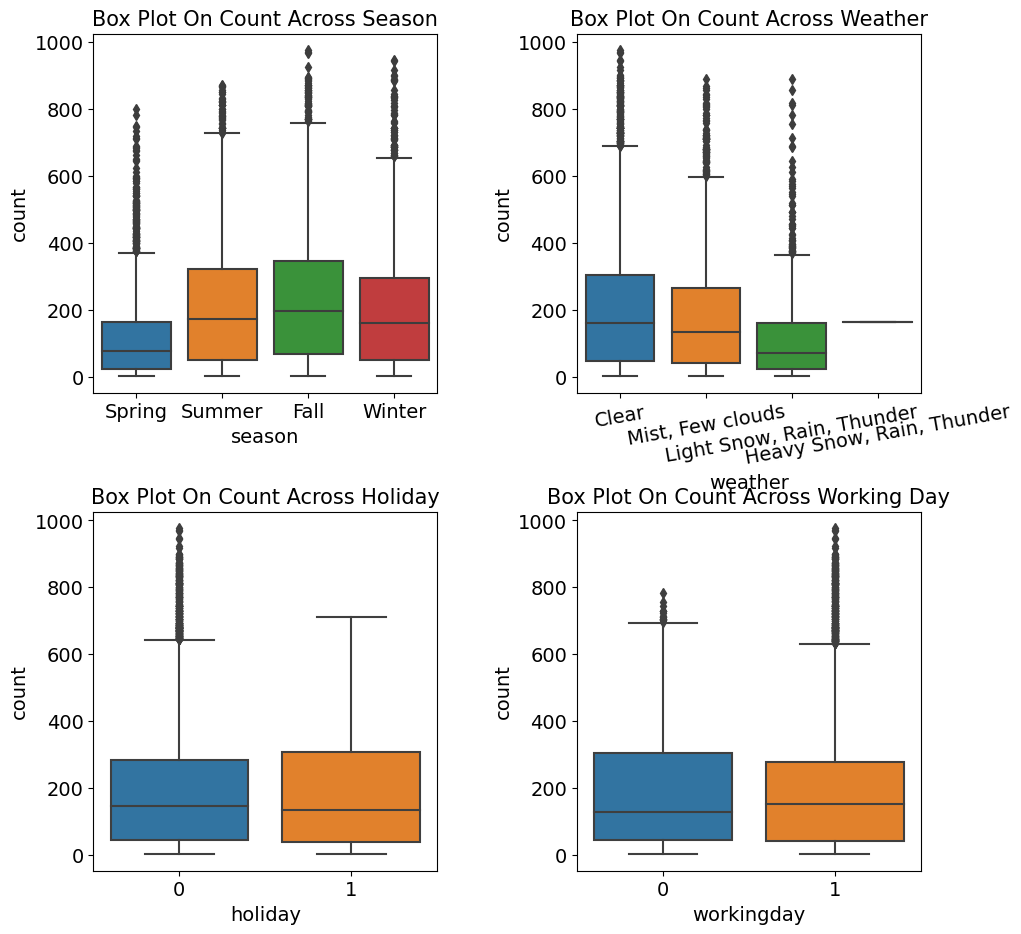

In [56]:
# m행 n열 Figure 준비
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10,10)

# 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x = 'season', y = 'count', data = train, ax = axes[0,0])
sns.boxplot(x = 'weather', y = 'count', data = train, ax = axes[0,1])
sns.boxplot(x = 'holiday', y = 'count', data = train, ax = axes[1,0])
sns.boxplot(x = 'workingday', y = 'count', data = train, ax = axes[1,1])

# 서브플롯 제목 달기 
axes[0, 0].set(title = 'Box Plot On Count Across Season')
axes[0, 1].set(title = 'Box Plot On Count Across Weather')
axes[1, 0].set(title = 'Box Plot On Count Across Holiday')
axes[1, 1].set(title = 'Box Plot On Count Across Working Day')

# x축 라벨 겹침 해결
axes[0,1].tick_params('x', labelrotation = 10)

- 봄에 가장 적고 가을에 가장 많음
- 날씨가 좋을수록 대여 수량 많음
- 공휴일이 아닐 때는 이상치가 많음 
- 근무일일 때는 이상치가 많음

### 포인트플롯 
범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용<br>
막대그래프와 같은 정보를 제공하지만 점과 선으로 제공하기에 한 화면에 여러 그래프를 그릴 때 좋음 

<Axes: xlabel='hour', ylabel='count'>

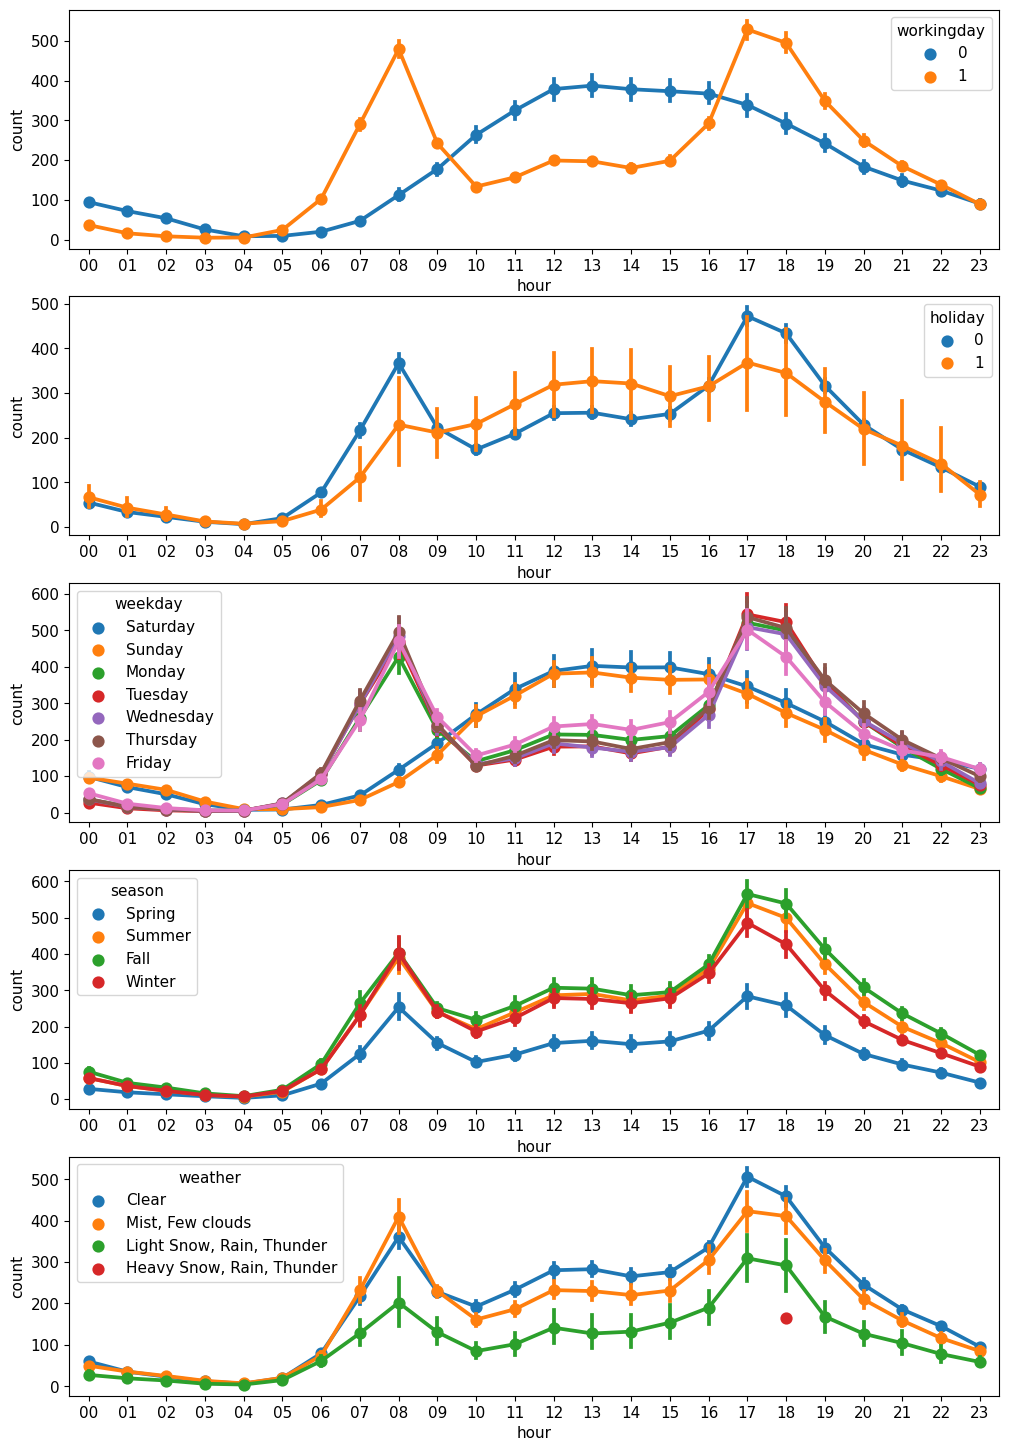

In [57]:
# m행 n열 Figure 준비
mpl.rc('font', size = 11)
figure, axes = plt.subplots(nrows = 5)
figure.set_size_inches(12,18)

# 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트 플롯
# hue 파라미터에 전달한 피처를 기준으로 그래프가 나뉨 
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'holiday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weekday', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'season', ax = axes[3])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weather', ax = axes[4])

- 근무일에는 출퇴근시간에, 근무일이 아닐 때는 오후 12시~2시가 가장 많음
- 가을에 가장 많고 봄에 가장 적음
- 날씨가 좋을 때 가장 많음 
- 폭우가 내릴 때 대여 건수 1개 있음 => 이상치 제거 

### 산점도
데이터 간의 관계를 점으로 표현 

<Axes: xlabel='humidity', ylabel='count'>

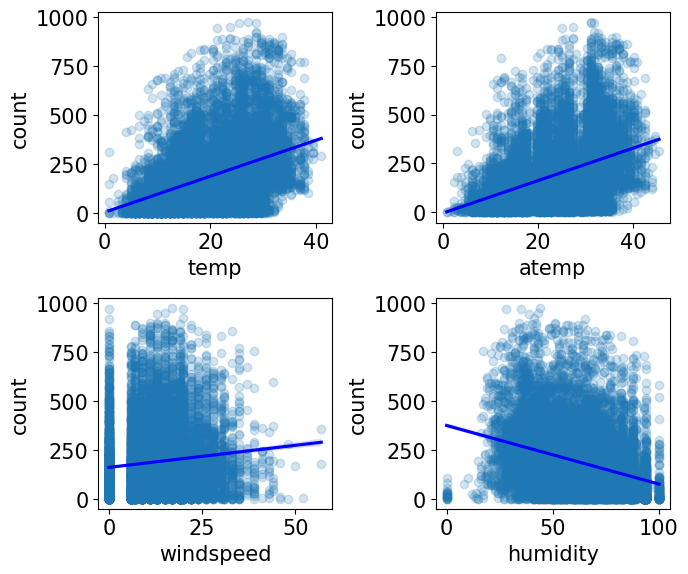

In [58]:
# m행 n열 Figure 준비
mpl.rc('font', size = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(7,6)

# 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도별 대여 수량 산점도 그래프 
sns.regplot(x = 'temp', y = 'count', data = train, ax = axes[0,0],
           scatter_kws = {'alpha':0.2}, line_kws = {'color':'blue'})
sns.regplot(x = 'atemp', y = 'count', data = train, ax = axes[0,1],
           scatter_kws = {'alpha':0.2}, line_kws = {'color':'blue'})
sns.regplot(x = 'windspeed', y = 'count', data = train, ax = axes[1,0],
           scatter_kws = {'alpha':0.2}, line_kws = {'color':'blue'})
sns.regplot(x = 'humidity', y = 'count', data = train, ax = axes[1,1],
           scatter_kws = {'alpha':0.2}, line_kws = {'color':'blue'})

- 온도나 체감 온도가 높을수록 대여량 많음
- 습도가 낮을수록 대여량 많음
- 풍속이 셀수록 대여량이 많다고 나옴 => 이상함, windspeed에 결측치가 많아 0으로 기록됨 => windspeed 제거 

### 히트맵 
데이터 간의 관계를 색상으로 표현 

In [59]:
train[['temp','atemp','humidity','windspeed','count']].corr() # 수치형 데이터들

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

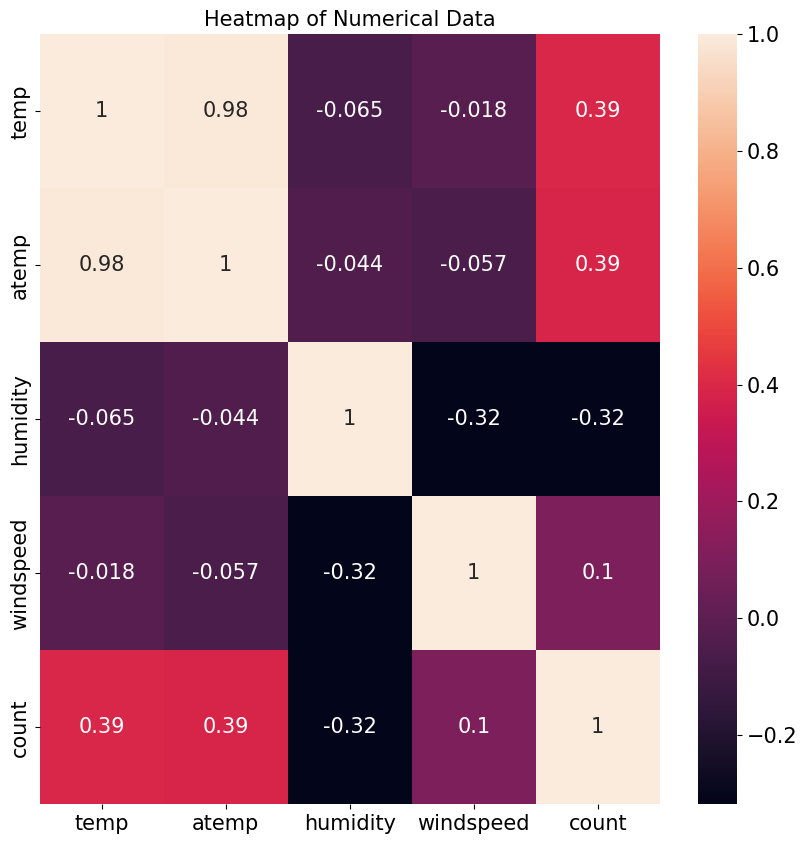

In [60]:
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot = True)
ax.set(title = 'Heatmap of Numerical Data')

- 풍속과 타깃값 사이의 상관계수 낮으므로 windspeed 피처 제거 